Aim: Predict the Heart Failure (heart disease) based on the features

# Variable Details:
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

# Loading the Dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Check for Missing Values

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Encoding the Dataset

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()

In [9]:
cat_cols = data.select_dtypes(include=['object']).columns

In [10]:
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [11]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## Visualizations

In [12]:
import matplotlib.pyplot as plt

In [13]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [14]:
numerical_cols

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

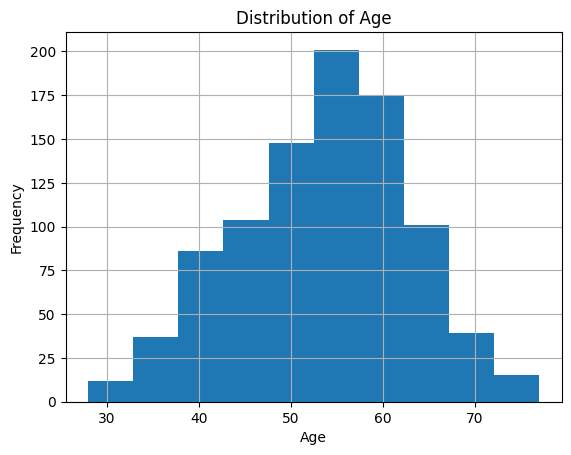

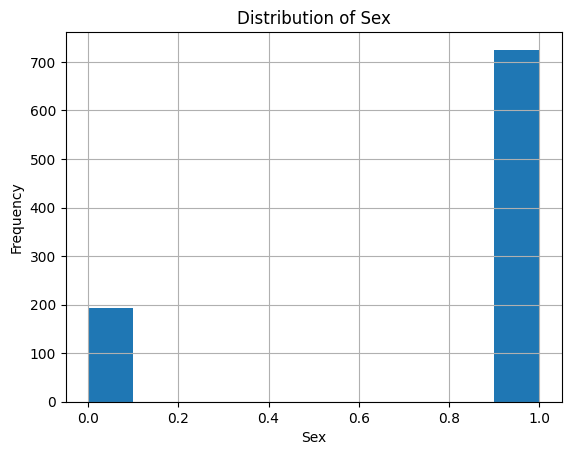

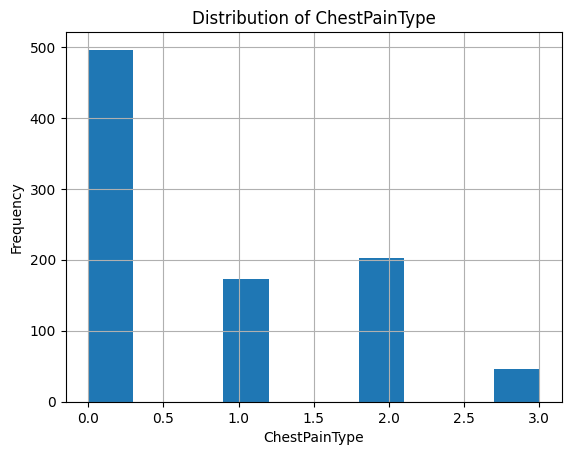

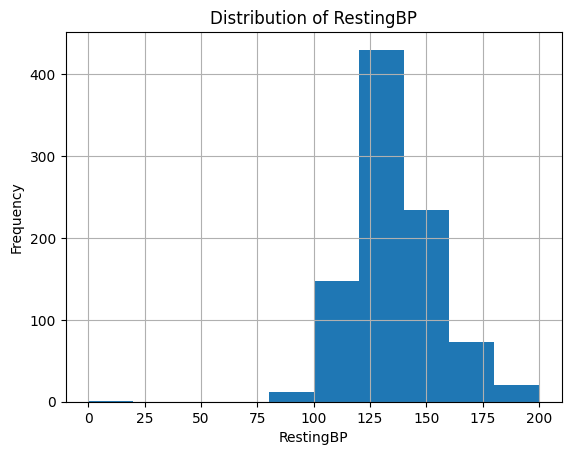

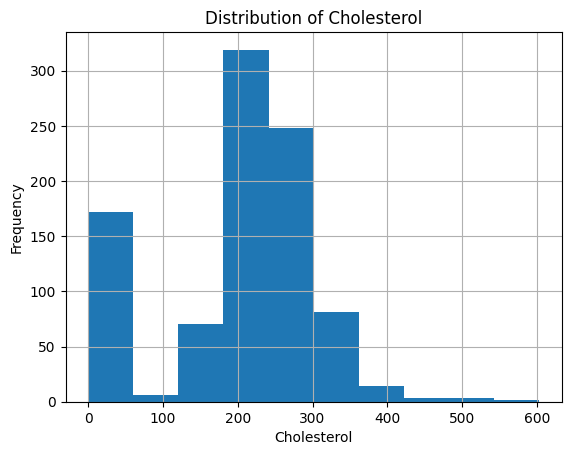

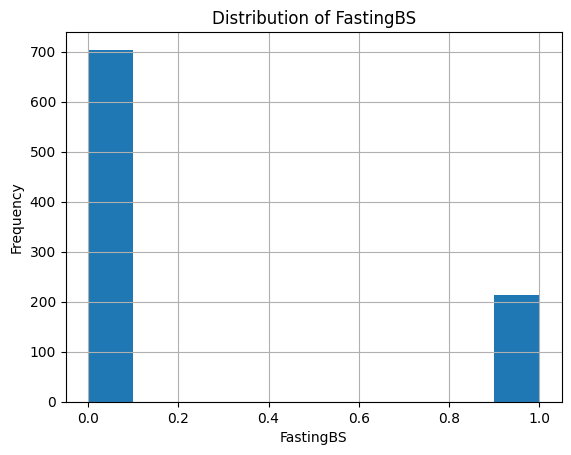

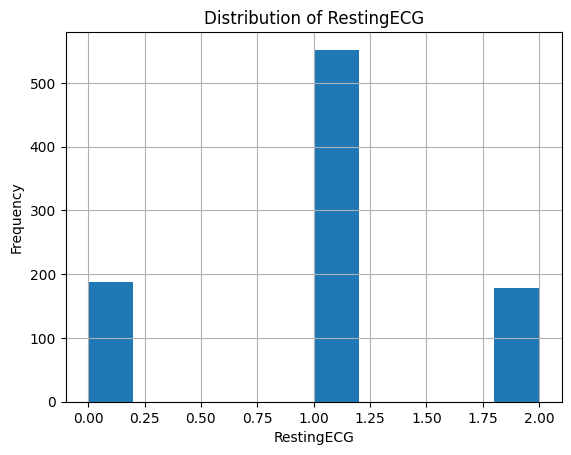

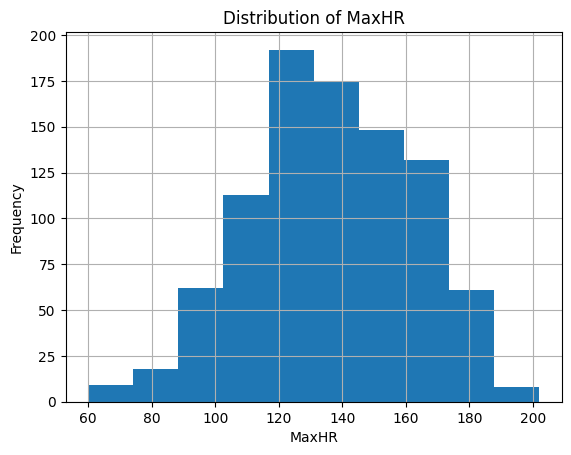

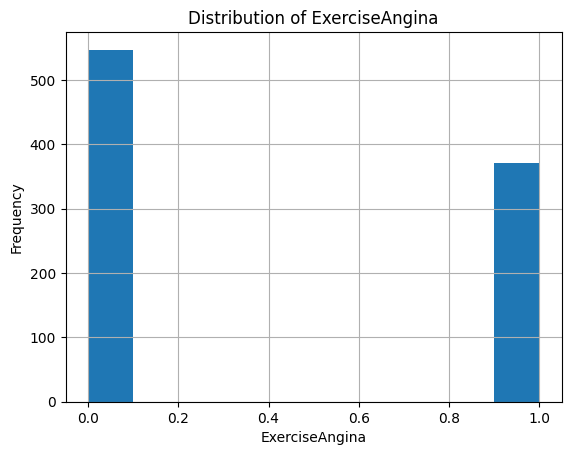

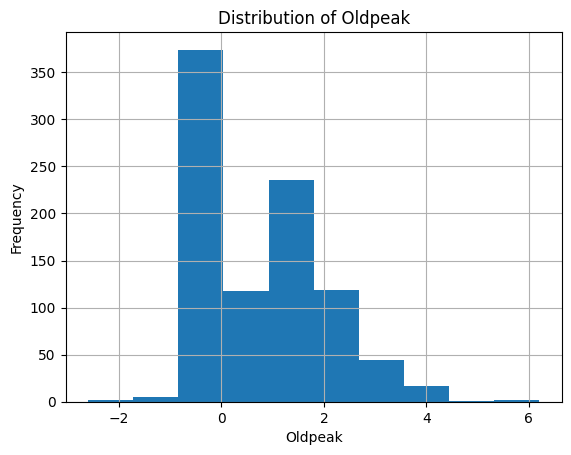

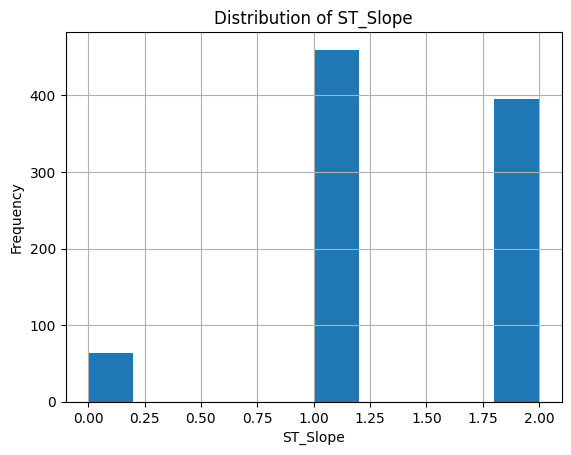

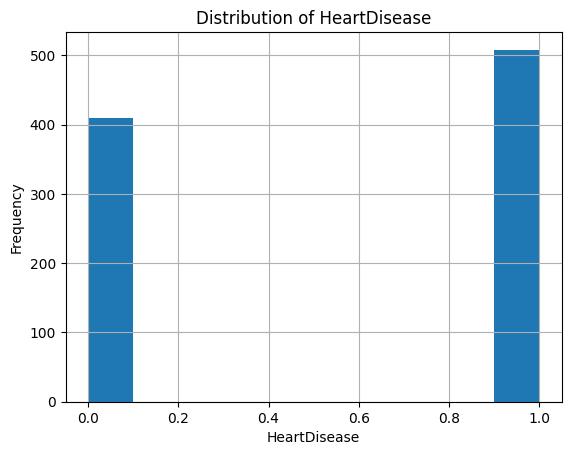

In [15]:
for num_col in numerical_cols:
    plt.figure()
    data[num_col].hist()
    plt.title(f'Distribution of {num_col}')
    plt.xlabel(num_col)
    plt.ylabel('Frequency')
    plt.show()

## Box Plot

<Figure size 640x480 with 0 Axes>

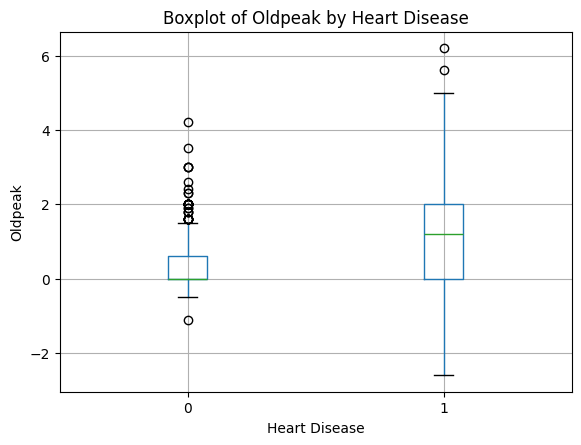

In [16]:
plt.figure()
data.boxplot(column='Oldpeak', by='HeartDisease')
plt.title('Boxplot of Oldpeak by Heart Disease')
plt.suptitle('')
plt.xlabel('Heart Disease')
plt.ylabel('Oldpeak')
plt.show()

# Feature Selection

In [17]:
corr = data.corr()
corr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [18]:
import seaborn as sns

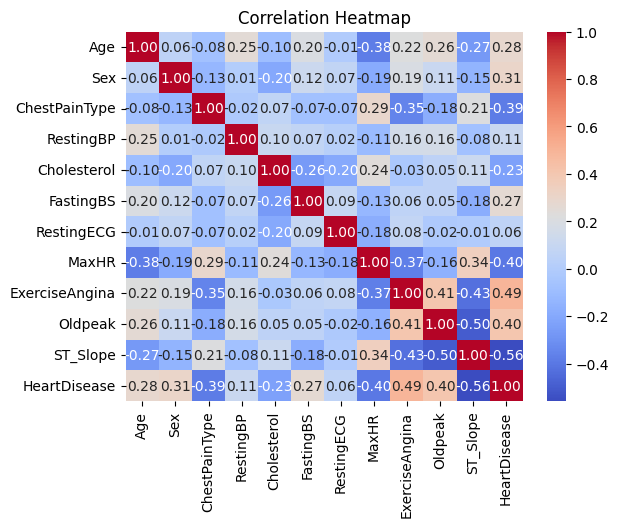

In [19]:
plt.figure()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
corr_target =corr["HeartDisease"].abs().sort_values(ascending=False)
selected_features = corr_target[corr_target > 0.1].index.tolist()
selected_features.remove("HeartDisease")
selected_features

['ST_Slope',
 'ExerciseAngina',
 'Oldpeak',
 'MaxHR',
 'ChestPainType',
 'Sex',
 'Age',
 'FastingBS',
 'Cholesterol',
 'RestingBP']

# Splitting data into testing and training

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data[selected_features]
y = data["HeartDisease"]

In [23]:
X.head()

,ST_Slope,ExerciseAngina,Oldpeak,MaxHR,ChestPainType,Sex,Age,FastingBS,Cholesterol,RestingBP
0,2,0,0.0,172,1,1,40,0,289,140
1,1,0,1.0,156,2,0,49,0,180,160
2,2,0,0.0,98,1,1,37,0,283,130
3,1,1,1.5,108,0,0,48,0,214,138
4,2,0,0.0,122,2,1,54,0,195,150


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(734, 10)

In [26]:
X_test.shape

(184, 10)

# Machine Learning (Logistic Regression, Random Forest)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [30]:
X_train_scaled[:5]

array([[-2.25746543, -0.83846064, -0.09706109,  2.28435288,  1.31674291,
         0.54060477, -1.24506731,  1.84260945,  0.372803  , -0.70898547],
       [ 1.07985506, -0.83846064, -0.83628643,  1.65224147,  1.31674291,
         0.54060477, -1.8862362 , -0.5427086 ,  0.08614581, -0.16628515],
       [-0.58880518,  1.19266183,  0.08774524, -0.44162756, -0.80974619,
         0.54060477,  0.25099346,  1.84260945,  0.12313384,  0.91911549],
       [ 1.07985506, -0.83846064, -0.83628643,  0.22999081,  1.31674291,
        -1.84978019, -1.77937472, -0.5427086 ,  0.10463982, -0.16628515],
       [-0.58880518, -0.83846064, -0.83628643, -1.27127378, -0.80974619,
         0.54060477, -0.28331396,  1.84260945, -1.84647842, -0.70898547]])

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression(max_iter=1000)

In [33]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [34]:
y_pred_lr = lr.predict(X_test_scaled)

In [35]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')

Logistic Regression Accuracy: 0.85


In [36]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



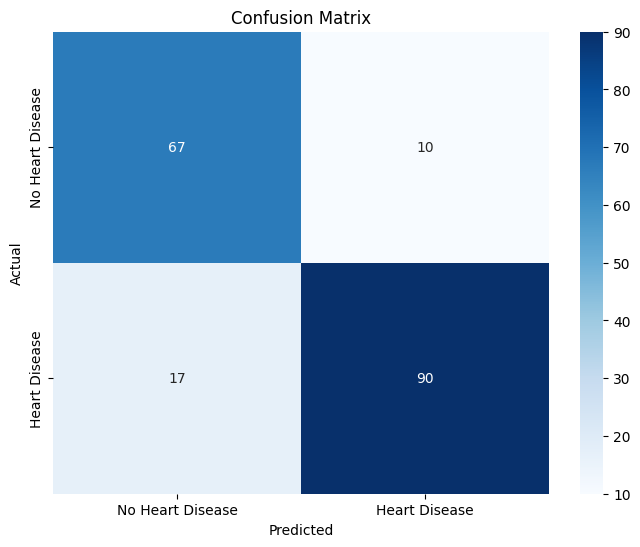

In [37]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Label 0 (no heart disease)
- Recall = True Positives / (True Positives + False Postive) = 68 / (68+9) = 0.88
- Precision = True Positive / (True Postive + False Negative) = 68 / (68+19) = 0.78
- F1 Score = 2 x (Precision x Recall) / (Precision + Recall) = 2 x (0.78 x 0.88) / (0.78+0.88) = 0.83

### Label 1 (heart disease)
-  88 / (88 + 19) = 0.82
- 88 / (88 + 9) = 0.907 == 0.91
- -----------------

## Random Forest

In [38]:
# random forest

from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=120, random_state=42)

In [40]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=120, random_state=42)

In [41]:
y__pred_rf = rf.predict(X_test_scaled)

In [42]:
accuracy_rf = accuracy_score(y_test, y__pred_rf)

In [43]:
print(accuracy_rf)

0.875


In [44]:
print(classification_report(y_test, y__pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# Save the model

In [45]:
import joblib

In [46]:
joblib.dump(rf, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [52]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Building an Interface in Gradio

In [47]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

c:\Users\UZAIR KABEER\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
model = joblib.load("heart_disease_model.pkl")
scaler = joblib.load("scaler.pkl")

In [55]:
scaler.feature_names_in_

array(['ST_Slope', 'ExerciseAngina', 'Oldpeak', 'MaxHR', 'ChestPainType',
       'Sex', 'Age', 'FastingBS', 'Cholesterol', 'RestingBP'],
      dtype=object)

In [68]:
sex_mapping= {"F":0, "M": 1}
cp_mapping= {"ASY" : 0, "ATA" : 1, "NAP" : 2, "TA" : 3}
ecg_mapping= {"LVH":0, "Normal": 1, "ST": 2}
angina_mapping= {"N" : 0, "Y" : 1}
slope_mapping= {"Down":0, "Flat": 1, "Up": 2}

In [69]:
X.head()

,ST_Slope,ExerciseAngina,Oldpeak,MaxHR,ChestPainType,Sex,Age,FastingBS,Cholesterol,RestingBP
0,2,0,0.0,172,1,1,40,0,289,140
1,1,0,1.0,156,2,0,49,0,180,160
2,2,0,0.0,98,1,1,37,0,283,130
3,1,1,1.5,108,0,0,48,0,214,138
4,2,0,0.0,122,2,1,54,0,195,150


In [103]:
def predict(Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope):
    sex = sex_mapping[Sex]
    cp = cp_mapping[ChestPainType]
    ecg = ecg_mapping[RestingECG]
    ang = angina_mapping[ExerciseAngina]
    slope = slope_mapping[ST_Slope]
    
    data = pd.DataFrame({
            "Age":Age,
            "Sex": sex,
            "ChestPainType": cp,
            "RestingBP": RestingBP,
            "Cholesterol" : Cholesterol,
            "FastingBS" : FastingBS,
            "MaxHR":MaxHR,
            "ExerciseAngina": ang,
            "Oldpeak" : Oldpeak,   
            "ST_Slope": slope,
    }, index=[0])
    
    data = data[scaler.feature_names_in_]
    print(len(data))
    X_scaled =scaler.transform(data)
    prediction = model.predict(X_scaled)
    
    return "Heart Disease" if prediction[0] == 1 else "No Heart Disease"
    

In [104]:
inputs = [
    gr.Slider(20,100, step=1, label="Age (years)"),
    gr.Radio(["F","M"], label="Sex"),
    gr.Dropdown(["ASY", "ATA", "NAP", "TA"], label="Chest Pain Type"),
    gr.Slider(80,200, step=1, label="Resting Blood Pressure (mm Hg)"),
    gr.Slider(100,300, step=1, label="Cholesterol (mg/dl)"),
    gr.Radio(["0", "1"], label="Fasting Blood Sugar > 120 mg/dl"),
    gr.Dropdown(["LVH", "Normal", "ST"], label="Resting ECG"),
    gr.Slider(60,200, step=1, label="Max Heart Rate (bpm)"),
    gr.Radio(["N", "Y"], label="Exercise Angina"),
    gr.Slider(0.0,6.0, step=0.1, label="Oldpeak"),
    gr.Dropdown(["Down", "Flat", "Up"], label="ST Slope"),
]

In [105]:
interface = gr.Interface(fn=predict,
                         inputs=inputs, 
                         outputs="text",
                         title="Heart Disease Prediction",
                         description="Predict the presence of heart disease based on various health metrics.",
                         theme="default",
                         )

In [ ]:
if __name__ == "__main__":
    interface.launch()

* Running on local URL:  http://127.0.0.1:7870
* To create a public link, set `share=True` in `launch()`.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
